# Mader Modell Visualisation

## Modelling of an all-out sprint based on phosphates 
In order to generate energy phosphate is split from the adenosine phosphates. This may occur in two reactions:

> reaction 1: $ATP    \Rightarrow ADP + Pi$ 

> reaction 2: $2 ADP \iff ATP + AMP$

The muscle cell has resting stores of $5 \frac{mmol}{kg_{muscle}}$ ATP. This amount of ATP lasts for about 1-2 muscular contractions. Consequently a system to resynthesize ATP to prevent contractioninsuffiency is needed that acts instantaneously. This system is provided by the amount of phosphocreatine stored inside the muscle cell ($23 \frac{mmol}{kg_{muscle}}$). Phosphocreatine can resynthesize ATP in the following reaction:

> reaction 3: $ADP + PCr + H \iff ATP + Pi$ 

Solving the above expressed reactions mathematically, the equilibrium between PCr, Pi and the adenosine phosphatesa (ATP, ADP and AMP) can be described the following equations. First Reaction three is rearranged to equation 1 (divided by ADP and Pi, H+ is substituted to the equilibrium constant $M_1 = H * 1.66 * 10^9$)

> eq. 1: $\frac {ATP}{ADP} = M_1 * \frac {PCr}{Sc - PCr}$

The ratio of ATP and ADP is defined as Q for further simplification:

> eq. 2: $\frac {ATP}{ADP} = Q$ ; $Q = M_1 * \frac {PCr}{Sc - PCr}$

Rearranging eq. 2 to calculate ATP:

> eq. 3: $ATP = ADP * Q$

Before eq. 3 is substituted, reaction 2 needs to be converted into an equation, whereas $M_3$ is the equilibrium constant of approximately 0.85 - 1.05:

> eq. 4: $ATP * AMP = M_3 * ADP^2$ 

Rearranging eq. 4 to AMP yields:

> eq. 5: $AMP = \frac {M_3 * ADP^2}{ATP}$

In the following eq. 5 is substituted into eq. 6, that describes the sum of the adenosine nucleotides:

> eq. 6: $S[a] = ATP + ADP + AMP$

> eq. 7: $S[a] = ATP + ADP + \frac {M_3 * ADP^2}{ATP}$

Now eq. 3 is substituted into eq. 7:

> eq. 8: $S[a] = ADP * Q + ADP + \frac {M_3 * ADP^2}{ADP * Q}$

Lastly ADP is isolated and can consequently be calculated using eq. 9:

> eq. 9: $ADP = \frac {Sa * Q}{M_3 + Q + Q^2}$ 

The resulting distribution of phosphates is calculated using eq. 10:

 >eq. 10: $S[c] = PCr + Pi$


The following summarizes the described mathematical computations:

$$
\begin{aligned}  
&\iff &\frac {ATP}{ADP} & = M_1 * \frac {PCr}{Sc - PCr} &(1)~& reaction~one~in~mathematical~terms \newline   
&\iff & Q & = M_1 * \frac {PCr}{Sc - PCr} &(2)~ &substituting~Q \newline 
&\iff & ATP & = ADP * Q &(3)~ &rearranging~eq.~1 \newline 
&\iff &ATP * AMP & = M_3 * ADP^2 &(4)~ &reaction~two~in~mathematicals~terms \newline  
&\iff & S[a] & = ATP + ADP + AMP  &(5)~&equilibrium~of~adenosine~nucleotides~in~mathmatical~terms \newline  
&\iff & S[a] & = ATP + ADP + \frac {M_3 * ADP^2}{ATP} &(6)~& substituting~eq.4~into~eq.5   \newline  
&\iff & S[a] & =  ADP * Q + ADP + \frac {M_3 * ADP^2}{ADP * Q} &(7)~&substituting~eq.3~into~eq.6  \newline 
&\iff & ADP & = \frac {Sa * Q}{M_3 + Q + Q^2}  &(8)~&isolating~ADP~in~eq.7 \newline 
&\iff & S[c] & = PCr + Pi  &(9)~&equilibrium~of~phosphate~in~mathematical~terms \newline 
\end{aligned}
$$

If the PCr store diminishes (as a function of ATP demand for energy production) the amount of the free phosphate, as well as the amount of the adenosine nucleotides can be calculated in the following order:

0. Define start values for PCr, Pi, Sc, Sa, M1 and M3
1. Deduct ATP demand from PCr store in 
2. Calculate Q using eq. 2
3. Calculate ADP using eq. 9
4. Calculate ATP using using eq. 3
5. Calculate AMP using eq. 6
6. Calculate Pi using using eq. 10

In the following section of code the equations are implemented. Due to the decreasing phosphocreatine stores contractioninsuffiency occurs at phosphocreatine stores below $1 \frac {mmol}{kg_{muscle}}$.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import ipywidgets as widgets
%matplotlib inline

# disable warnings for division through zero
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [115]:
# Defining Resting Values
PCr = 23      # mmol/kg.m
Pi = 3        # mmol/kg.m
Sc = 26       # mmol/kg.m
Sa = 7        # mmol/kg.m
M1 = 166      # mmol/kg.m
M3 = 1.05     # pH = 7

# Calculating continuum of concentrations
PCr = np.arange(PCr, 0, -0.1)
Q = M1 * (PCr / (Sc - PCr))
ADP = (Sa * Q) / (M3 + Q + Q ** 2)
ATP = ADP * Q
AMP = Sa - ADP - ATP
Pi = Sc - PCr
axis = ADP + AMP + Pi

In [116]:
def sprint_phosphates():
    plt.plot(axis, PCr, label='PCr')
    plt.plot(axis, ADP, label='ADP')
    plt.plot(axis, ATP, label='ATP')
    plt.plot(axis, AMP, label='AMP')
    plt.axhline(1, linestyle='--', color='grey', label='Contractioninsuffiency PCr')
    plt.legend()
    plt.xlabel('ADP + AMP + Pi [mmol * kg^-1]')
    plt.ylabel('[mmol * kg^-1]')
    

def interactive_sprint_phosphates(PCr_i):

    sprint_phosphates()
    plt.title('Modelling an all out sprint based on phosphates')
    
    # calculating dots from interactive toole
    Q = M1 * (PCr_i / (Sc - PCr_i))
    ADP = (Sa * Q) / (M3 + Q + Q ** 2)
    ATP = ADP * Q
    AMP = Sa - ADP - ATP
    Pi = Sc - PCr_i
    axis = ADP + AMP + Pi

    # plotting dots from interactive tool
    plt.scatter(ADP+AMP+Pi, PCr_i)
    plt.scatter(ADP+AMP+Pi, ADP)
    plt.scatter(ADP+AMP+Pi, ATP)
    plt.scatter(ADP+AMP+Pi, AMP)

    # printing concentration from interactive tool
    print('PCr: ' + str(PCr_i))
    print('ATP: ' + str(ATP))
    print('ADP: ' + str(ADP))
    print('AMP: ' + str(AMP))


# creating interactive tool and calling function
widgets.interact(interactive_sprint_phosphates, PCr_i=widgets.FloatSlider(value=20, min=1, max=23, step=0.1))

interactive(children=(FloatSlider(value=20.0, description='PCr_i', max=23.0, min=1.0), Output()), _dom_classes…

<function __main__.interactive_sprint_phosphates(PCr_i)>

The graph above shows that during an all out sprint that requires $3 \frac{mmol}{kg_{muscle} * s}$ contractioninsufficiency is reached within 7s. Fortunately, ATP can also be resynthesized during glycolysis and oxidative phosphorylation. However, these two systems cannot resynthesize ATP at the same rate as PCr. On the other side these systems have a higher capacity for synthesizing ATP. 

In the first step this notebook focuses on the ATP resnythesis through glycolyis. The following reaction describes the process of ATP resynthesis in Glycolysis:

reaction 4: $1 Glucose + 2 ADP + 2 Pi + 2 NAD^+ ==> 2 Pyruvat + 2 ATP + 2 NADH + 2 H^+ + 2 H_2O$

Reaction 4 shows that glycolysis yields 2 ATP. Mader & Heck (1986) suggest that Glycolysis is activated by the ADP and AMP concentration in the muscle and can be described with the following Hill-Equation. VLamax is defined as the maximal lactate production rate (or rather maximal pyruvate production rate) in $\frac {mmol}{kg_{muscle} * s} $. Ks2 represents the concentration at which the product of ADP and AMP activate 50% of VLamax. Lastly the entire equation is multiplied with the äquivalent of lactate to ATP in order to calculate the ATP resynthesize of this system.

eq. 10: $ATP~Glycolysis = \frac{Vlamax}{1 + \frac{Ks2}{ADP * AMP}} * K_{la-ATP} $

The following figure shows the ATP resynthesize rate of the glycolytic system in the all out sprint that has been modelled previously. 


Text(0.5, 0.98, 'Modelling an all out sprint based on phosphates')

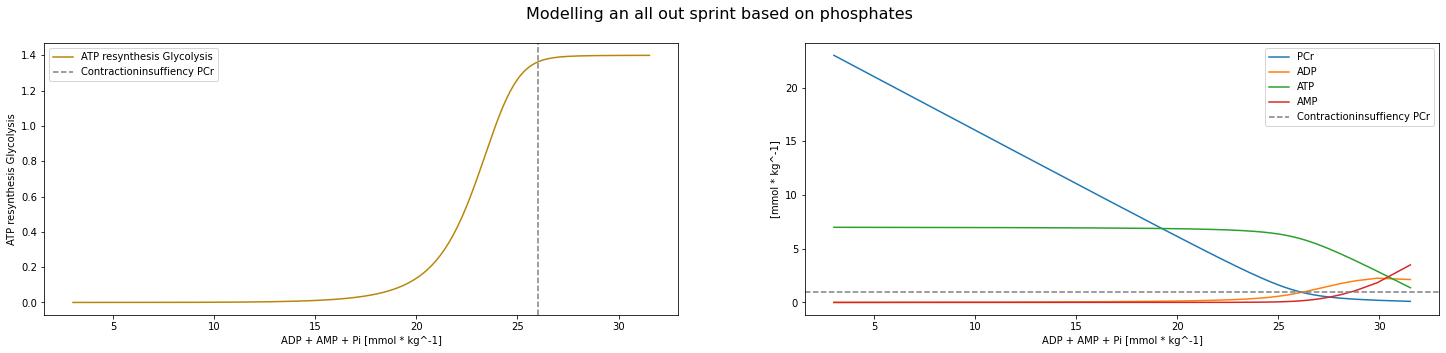

In [117]:
# additional parameters for glycolysis
Kla_atp = 1.4
vlamax = 60 / 60 
Ks2 = 0.15 ** 3
Vlass = vlamax / (1+ (Ks2/(ADP * AMP))) * Kla_atp

def sprint_glycolysis():
    plt.plot(axis, Vlass, label="ATP resynthesis Glycolysis", color="darkgoldenrod")
    plt.xlabel('ADP + AMP + Pi [mmol * kg^-1]')
    plt.ylabel('ATP resynthesis Glycolysis')
    plt.axvline(26, linestyle='--', color='grey', label='Contractioninsuffiency PCr')
    plt.legend()


# plot glycolysis and phosphates
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
sprint_glycolysis()
plt.subplot(1,2,2)
sprint_phosphates()

plt.suptitle('Modelling an all out sprint based on phosphates', fontsize = 16)

In this plot it can be seen that the maximal activation of glycolysis is theorethical and cannot be reached, since the contractioninsuffiency is reached due to the low amounts of the diminishing PCr stores (defined as $1 \frac {mmol}{kg_{muscle}}$ in this example) before enough ADP and AMP accumulates to maximally activate glycolysis.

Furthermore it must be respected, that glycolysis cannot resynthesize ATP indefinetely. Glycolysis is controlled by the key-enzyme Phosphofructokinase (PFK) which's activity relies on the intramuscular $H^+$ concentration. Reaction 4 shows that glycolysis itself produces $H^+$-ions in the process of ATP resynthesis. Therefore with ongoing activation of glycolysis and thus accumulation of $H^+$-ions Glycolysis inhibits itself. This can be accounted for mathematically using the following equation with $ Ks3 = 10^{-20.2} $:

> eq. 11: $H^+ derived~activity  =  \frac{1}{\frac {H+^3}{Ks3}}$

Text(0, 0.5, 'Activity of PFK in %')

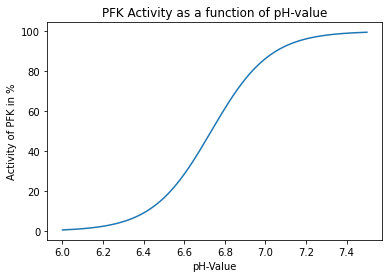

In [118]:
# additional parameters for PFK activity
ph = np.arange(7.5, 6, -0.001) * -1
H= 10 ** ph
Ks3 = 10 ** (-20.2)
PFK_Activity = 100 / (1 + (H ** 3/ Ks3))

# plot PFK ~ ph
plt.plot(ph*-1, PFK_Activity)
plt.title('PFK Activity as a function of pH-value')
plt.xlabel('pH-Value')
plt.ylabel('Activity of PFK in %')


Consequently the H+ derived activity must be multiplied with the activiation of glycolysis from the product of ADP and AMP.

> eq. 12: $ATP~Glycolysis = \frac{1}{\frac {H+^3}{Ks3}} * \frac{Vlamax}{1 + \frac{Ks2}{ADP * AMP}} * K_{laATP} $

The actual calculation of H+-ions in the muscle cell is not straightforward and is neglected for now. It will be explained at a later part of this notebook.

ATP may also be resynthesized through oxidative phosphorylation in the following reaction:

> Reaction 5: $1~Pyruvat + 6~O_2 + 38~ADP + 38~Pi ==> 6~CO_2 + 6~H_2O + 38~ATP$

The activation of oxidative phosphorylation is controlled by the amount of ADP in the cell and can be described in a Hill-Equation, where $Ks1 = 0.035^2 $ and $K_{O_2-ATP} = 0.233$

> eq. 13: $ATP~OxP = \frac{VO_2max}{1 + \frac{Ks1}{ADP^2}} * K_{O_2-ATP} $

The following lines of code display the ATP resynthesis of oxidative phosphorylation (uncorrected for time!), glycolysis and the equilibrium of the phosphates.

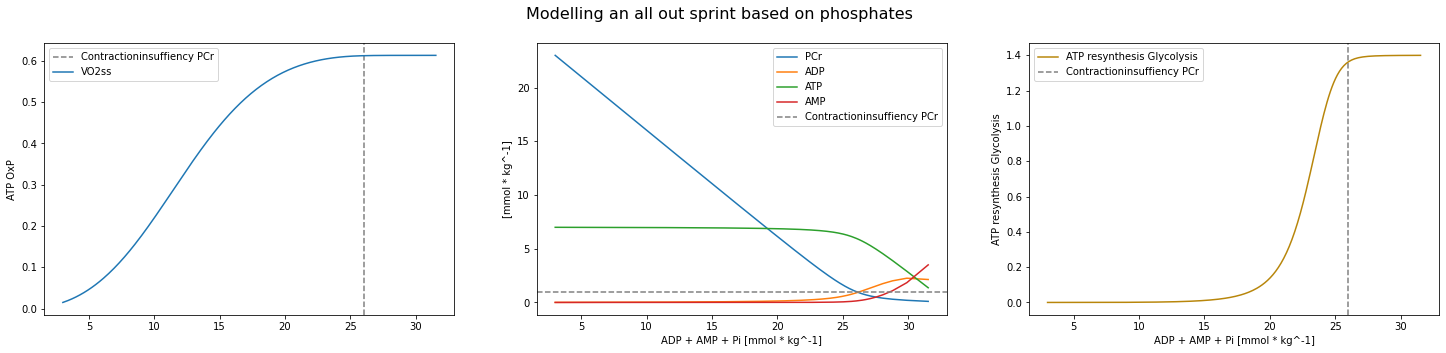

In [119]:
# calculate oxygen
VO2max = 158 / 60 # divide through 60 to convert minutes to seconds
Ks1 = 0.035 ** 2
Kla02 = 0.233
VO2ss = VO2max / (1 + (Ks1 / ADP ** 2)) * Kla02

# plots
plt.figure(figsize=(25,5))
plt.suptitle('Modelling an all out sprint based on phosphates', fontsize = 16)

# plot oxygen
plt.subplot(1,3,1)
plt.axvline(26, linestyle='--', color='grey', label='Contractioninsuffiency PCr')
plt.plot(axis, VO2ss, label='VO2ss')
plt.ylabel('ATP OxP')
plt.legend()

# plot phosphates
plt.subplot(1,3,2)
sprint_phosphates()

# plot glycolysis
plt.subplot(1,3,3)
sprint_glycolysis()

It must be noted that the figure displaying the ATP resynthesis from oxidative phosphorylation does not describe the actual ATP resynthesis of the system due to the intertia of oxidative phosphorylation. The inertia can be described mathematically by an differential equation that must be integrated. $k_{VO_2}$ is the time constant of the process and approximately 10s. $VO_{2ss}$ can be calculated using eq. 13 and $VO_{2a}$ is the actual ATP production of oxidative phosphorylation for a given timepoint. 

> eq. 14: $\frac {dVO_{2a}}{dt} = k_{VO_2} * (VO_{2ss} - VO_{2a}) $

This differential equation is integrated using the $4^{th} Order Runge-Kutta-Method$.

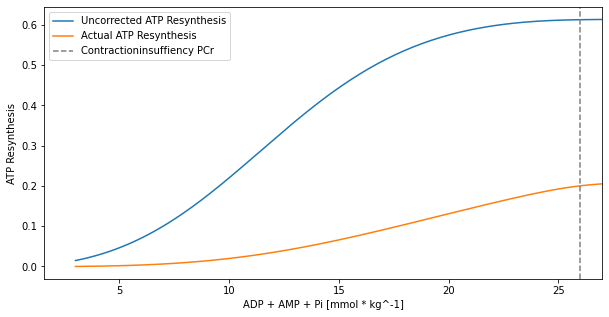

In [120]:
# Runge-Kutta-Function
def rk4(VO2ss, h = 1/32, T = 10):

    VO2a = 0
    VO2_t = np.array([])

    for VO2 in VO2ss:
        k1 = (VO2 - VO2a)/T

        #k2 = h * (f((x0 + h / 2), (y0 + k1 / 2)))
        k2 = VO2a + k1 / 2 * h
        k2 = (VO2 - k2)/T

        #k3 = h * (f((x0 + h / 2), (y0 + k2 / 2)))
        k3 = VO2a + 0.5 * k2 * h
        k3 = (VO2 - k3)/T

        #k4 = h * (f((x0 + h), (y0 + k3)))
        k4 = VO2a + k3 * h
        k4 = (VO2 - k4)/T

        VO2a = VO2a + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4) * h
        VO2_t = np.append(VO2_t, VO2a)
    return VO2_t

# get actual ATP resynthesis
VO2_t = rk4(VO2ss)

# plot oxygen
plt.figure(figsize=(10,5))
plt.plot(axis, VO2ss, label="Uncorrected ATP Resynthesis")
plt.plot(axis, VO2_t, label="Actual ATP Resynthesis")

# pcr limits
limit = 26
plt.axvline(limit, linestyle='--', color='grey', label='Contractioninsuffiency PCr')
plt.xlim(right=limit+1)
plt.ylabel("ATP Resynthesis")
plt.xlabel('ADP + AMP + Pi [mmol * kg^-1]')
plt.legend()

Since the process that has been shown is rather short (~7s), a longer period of time will now be inspected (2 minutes). The following displays a continous load and the consequent VO2-uptake uncorrected and corrected for inertia. The figure shows the gap between actual and uncorrected VO2 is closed after ~1min.

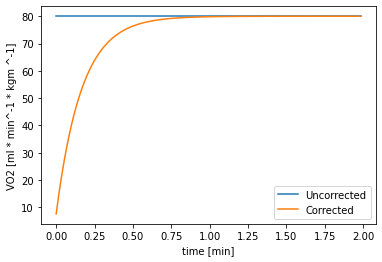

In [121]:
VO2ss = np.zeros(120) + 80
VO2_t = rk4(VO2ss, h = 1)
time = np.arange(0,2,1/60)

# plot oxygen as a function of time
plt.plot(time, VO2ss, label="Uncorrected")
plt.plot(time, VO2_t, label="Corrected")
plt.ylabel("VO2 [ml * min^-1 * kgm ^-1]")
plt.xlabel("time [min]")
plt.legend()

In the following the equilibrium of Phosphates needs to be described using a differential equation. 

> eq. 15: $\frac {dGP}{dt} = V_{ATP.VO2a} + V_{ATP.La} - V_{ATP.Belastung} $

The calculation of $V_{ATP.VO2a}$ and $V_{ATP.La}$ has previously been discussed in this notebook. For the sake of this demonstration $ V_{ATP.Belastung} = 0.2 $ which is equal to a load of $ 4.61 \frac{W}{kg} $. Due to the steady state of the performed load, the Euler-Method can be used to integrate the function.

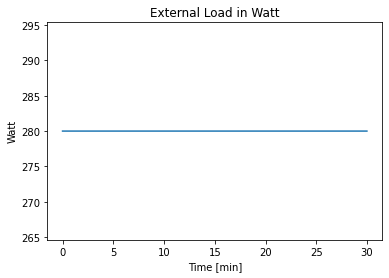

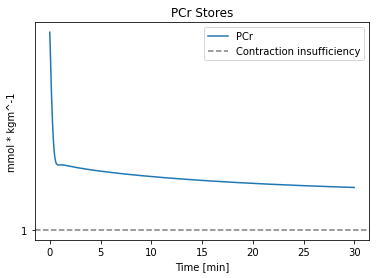

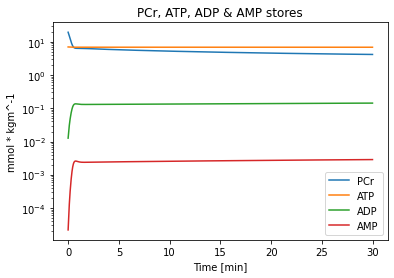

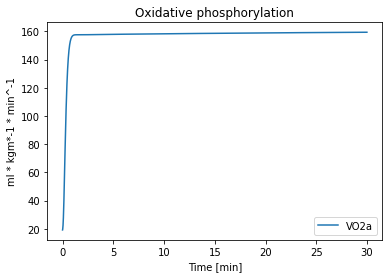

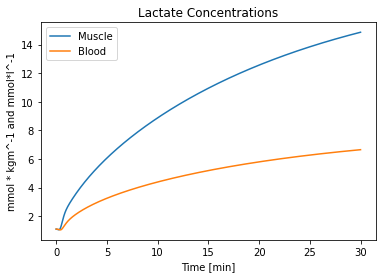

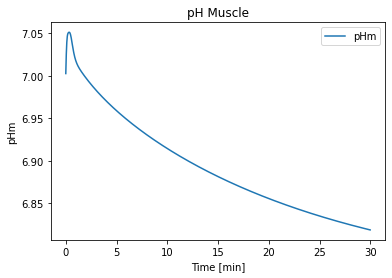

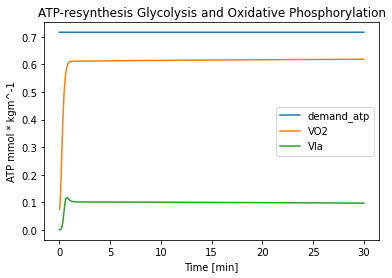

In [122]:
def interactive_dgp(Watt):
    V_ATP_Belastung = np.zeros(30*60) + (Watt/18.2*0.0466) 
    dgp(V_ATP_Belastung,Watt)


def dgp(V_ATP_Belastung,Watt):
    VO2max = 169 / 60 
    vlamax = 60 / 60 # 0.57777 mmol/l/s

    
    time = np.arange(0,len(V_ATP_Belastung)/60,1/60)

    Belastung = V_ATP_Belastung/0.0466*18.2
    plt.title("External Load in Watt")
    plt.ylabel("Watt")
    plt.xlabel("Time [min]")
    plt.plot(time, Belastung)
    plt.show()

    Kelox = 2
    VolRel = 0.75
    Vrel = 1.37
    KpyrO2 = 0.01475
    Lab = 1.1
    Lam = 1.1
    pHm = 7
    Ks3 = 10 ** - 20.2
    Ks2 = 0.15 ** 3
    Ks1 = 0.035 ** 2
    T = 10
    VO2a = 350/18.2/60


    # Defining Resting values
    PCr = 20                        # mmol/kg.m
    Pi = 5                          # mmol/kg.m
    Sc = 26                         # mmol/kg.m
    Sa = 7                          # mmol/kg.m
    M3 = 0.96     
    
    VO2_t = np.array([])
    Vla_t = np.array([])
    PCr_t = np.array([])
    ATP_t = np.array([])
    ADP_t = np.array([])
    AMP_t = np.array([])
    Pi_t = np.array([])
    Lam_t = np.array([])
    Lab_t = np.array([])
    pHm_t = np.array([])

    PCr_percent = np.array([])
    h = 1
    for n in V_ATP_Belastung:
        H = 10 ** (- pHm)
        M1 = H * 1.66 * 10 ** 9        # mmol/kg.m depending on pH-value

        # Calculating Phosphates
        Q = M1 * (PCr / (Sc - PCr))
        ADP = (Sa * Q) / (M3 + Q + Q ** 2)
        ATP = ADP * Q
        AMP = Sa - ADP - ATP
        Pi = Sc - PCr

        delta_GP = (VO2a * 0.233) + ((1 / (1 + (H ** 3/ Ks3))) * (vlamax / (1+ (Ks2/(ADP * AMP)))) * Kla_atp) - n # Mader
        #delta_GP = (VO2a * 0.233) + ((1 / (1 + (H ** 3/ Ks3))) * (vlamax / (1 + Ks2 * (((VO2max - VO2a)/(Ks1 * VO2a)) ** 1.5))) * Kla_atp) - n # Heck
        PCr = PCr + delta_GP
        PCr_percent = np.append(PCr_percent, delta_GP)

        VO2ss = VO2max / (1 + (Ks1/ADP**2))
        

        # RK4 Oxygen Uptake
        ##k1
        k1 = (VO2ss - VO2a)/T

        ##k2 = h * (f((x0 + h / 2), (y0 + k1 / 2)))
        k2 = VO2a + k1 / 2 * h
        k2 = (VO2ss - k2)/T

        ##k3 = h * (f((x0 + h / 2), (y0 + k2 / 2)))
        k3 = VO2a + 0.5 * k2 * h
        k3 = (VO2ss - k3)/T

        ##k4 = h * (f((x0 + h), (y0 + k3)))
        k4 = VO2a + k3 * h
        k4 = (VO2ss - k4)/T

        ## weighted average
        VO2a = VO2a + (1/6) * (k1 + 2 * k2 + 2 * k3 + k4) * h
        
        # appending values to array
        VO2_t = np.append(VO2_t, VO2a * 0.233)                                                                    # ATP equivalents 
        Vla_t = np.append(Vla_t, ((1 / (1 + (H ** 3/ Ks3))) * (vlamax / (1+ (Ks2/(ADP * AMP)))) * Kla_atp))       # ATP equivalents
        PCr_t = np.append(PCr_t, PCr)
        ATP_t = np.append(ATP_t, ATP)
        ADP_t = np.append(ADP_t, ADP)
        AMP_t = np.append(AMP_t, AMP)
        Pi_t = np.append(Pi_t, Pi)

        # Euler Lactate Muscle 
        Kdiff = 0.065 * (Lab ** -1.4) 
        vlass_ph = (1 / (1 + (H ** 3/ Ks3))) * (vlamax / (1+ (Ks2/(ADP * AMP))))                                 # Mader
        #vlass_ph = (1 / (1 + (H ** 3/ Ks3))) * (vlamax / (1 + Ks2 * (((VO2max - VO2a)/(Ks1 * VO2a)) ** 1.5)))   # Heck
        vlaoxm = ((KpyrO2 * VO2a) / (1 + ((VolRel ** 2 * Kelox) / Lam ** 2))) 
        dtlamdt = VolRel**-1 * (vlass_ph - vlaoxm) - Kdiff * (Lam - Lab)
        Lam = Lam + dtlamdt
        Lam_t = np.append(Lam_t, Lam)

        # Euler Lactate Blood
        vlaoxb = (KpyrO2 * VO2a)/(1 + ((Vrel ** 2 * Kelox) / (Lab ** 2))) 
        dlabdt = Vrel**-1 * (Kdiff*(Lam - Lab)-vlaoxb)
        Lab = Lab + dlabdt
        Lab_t = np.append(Lab_t, Lab)

        # Calculation of pH-value
        ## PCO2
        PCO2 = 40 + 55 * (VO2a/VO2max)
        ## pHm
        dbuff = 0.0185
        pHm = 7.85 + dbuff * (0.8 * Pi - Lam) - 0.55 * np.log10(PCO2)
        #pHm = 7.736 - 0.55 * np.log10(PCO2)                                    # alternative to pHm calculation in Mader 2003
        pHm_t = np.append(pHm_t, pHm)
        
    plt.title("PCr Stores")
    plt.plot(time, PCr_t, label="PCr")
    plt.axhline("1", label="Contraction insufficiency", linestyle="--", color="grey")
    plt.xlabel("Time [min]")
    plt.ylabel("mmol * kgm^-1")
    plt.legend()
    plt.show()

    plt.title("PCr, ATP, ADP & AMP stores")
    plt.plot(time,PCr_t, label="PCr")
    plt.plot(time,ATP_t, label="ATP")
    plt.plot(time,ADP_t, label="ADP")
    plt.plot(time,AMP_t, label="AMP")
    plt.xlabel("Time [min]")
    plt.ylabel("mmol * kgm^-1")
    plt.yscale("log")
    plt.legend()
    plt.show()

    plt.title("Oxidative phosphorylation")
    plt.plot(time, VO2_t*60/0.233, label="VO2a")
    plt.xlabel("Time [min]")
    plt.ylabel("ml * kgm*-1 * min^-1")
    plt.legend()
    plt.show()

    plt.title("Lactate Concentrations")
    plt.plot(time, Lam_t, label = "Muscle")
    plt.plot(time, Lab_t, label = "Blood")
    plt.xlabel("Time [min]")
    plt.ylabel("mmol * kgm^-1 and mmol*l^-1")
    plt.legend()
    plt.show()

    plt.title("pH Muscle")
    plt.plot(time, pHm_t, label="pHm")
    plt.xlabel("Time [min]")
    plt.ylabel("pHm")
    plt.legend()
    plt.show()

    # 5 energy
    demand_atp = Watt/18.2*0.0466
    VO2_atp = VO2_t
    Vla_atp = np.array(demand_atp - VO2_atp - (PCr_percent*-1))
    percent_VO2 = VO2_atp / demand_atp
    percent_vla = Vla_atp / demand_atp
    percent_pcr = (PCr_percent*-1) / demand_atp

    #plt.plot(time, percent_pcr*100, label="PCr")
    #plt.plot(time, percent_vla*100, label="La")
    #plt.plot(time, percent_VO2*100, label="VO2")
    #plt.legend()
    #plt.plot()
    #plt.show()
    
    plt.title("ATP-resynthesis Glycolysis and Oxidative Phosphorylation")
    plt.plot(time, V_ATP_Belastung, label='demand_atp')
    plt.plot(time, VO2_t, label="VO2")
    plt.plot(time, Vla_t, label="Vla")
    plt.xlabel("Time [min]")
    plt.ylabel("ATP mmol * kgm^-1")
    plt.legend()
    plt.show()


#widgets.interact(interactive_dgp,  Watt = widgets.FloatSlider(value=240, min = 50, max = 350, step=10))
interactive_dgp(280)

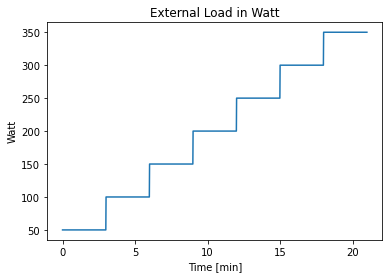

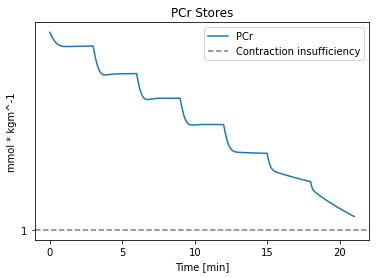

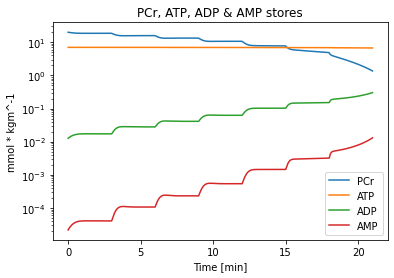

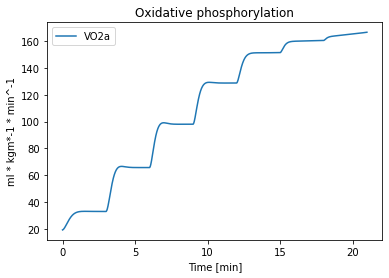

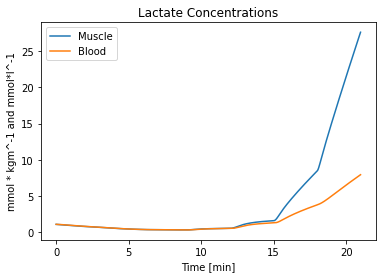

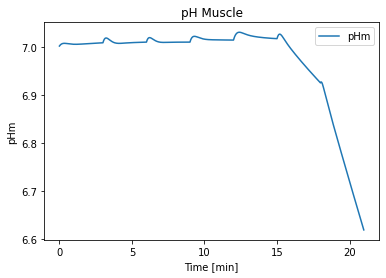

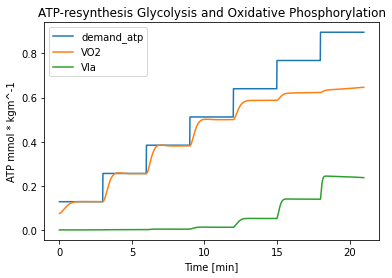

In [123]:
# Stufentest + 50W alle 3 min
steps = np.arange(50,400,50)
V_ATP_Belastung = np.repeat(steps, 3*60) / 18.2 * 0.0466 

dgp(V_ATP_Belastung, Watt = 200)

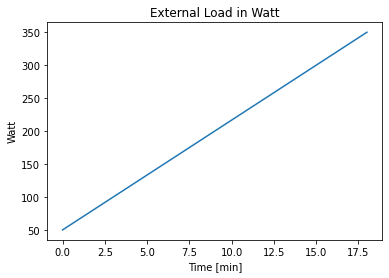

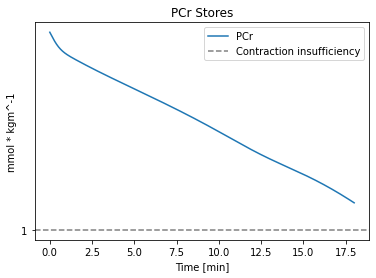

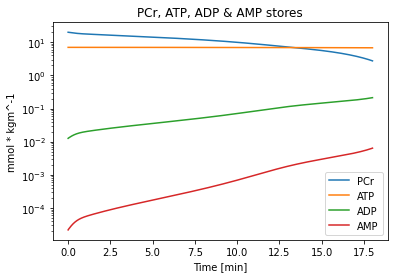

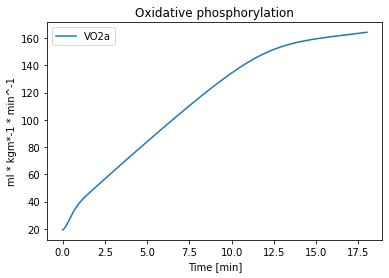

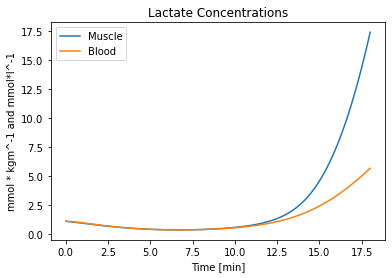

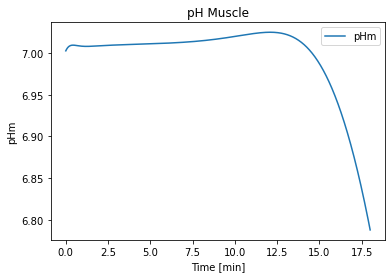

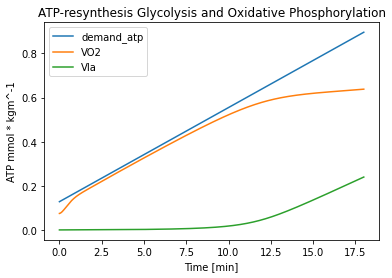

In [124]:
# Rampenförmige Belastung
V_ATP_Belastung = np.arange(50, 350, 0.2777) / 18.2 * 0.0466

dgp(V_ATP_Belastung, Watt = 200)

Following lines of code visualize the activation of glycolysis as a function of ADP content an different fixed pH-values.

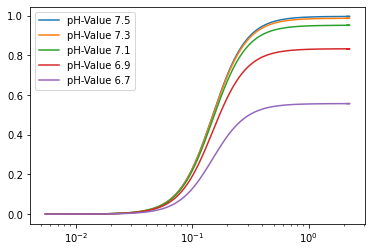

In [125]:
ph = np.arange(7.5, 6.5, -0.2) * -1
H= 10 ** ph
Ks3 = 10 ** (-20)
PFK_Activity = (1 + (H ** 3/ Ks3))
x = 0
for n in PFK_Activity:
    Vlassph = vlamax / (n* (1+ (Ks2/(ADP**3))))
    ph_actual = np.round(ph[x] * -1,1)
    plt.plot(ADP, Vlassph, label='pH-Value ' + str(ph_actual))
    x = x + 1
plt.xscale("log")
plt.legend()

The following lines of code visualize the activity of PDH as a function of lactate concentration and different constants.

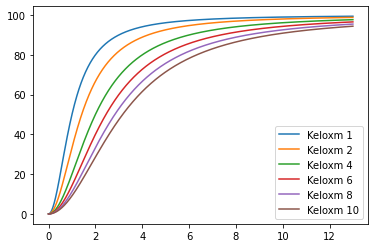

In [126]:
keloxm = [1,2,4,6,8,10]
lactate = np.arange(0,13,0.01)

for n in keloxm:
    PDH_activity = 100 / (1 + (n/ lactate **2))
    plt.plot(lactate, PDH_activity, label='Keloxm ' + str(n))
plt.legend()

The following lines of code provide an interactive tool that allows the manipulation of VO2max, Vlamax and the relative lactate distribution space (VolRel) and visualizes the pyruvate production and possible pyruvate elimination as a function of % of VO2max.

In [127]:
def plotProfile(VO2max, vlamax, VolRel):
    VO2ss = np.arange(0, VO2max, VO2max/100)
    Ks=0.25 ** 2                              # konstanten mader heck 1986
    Kss=1.20 ** 3   
    #Ks = 0.035 ** 2                          # konstanten heck Buch und mader 2002
    #Kss = 0.15 ** 3
    ADP = np.sqrt((Ks * VO2ss) / (VO2max - VO2ss)) 
    Kla02 = 0.01475
    vlass = 60 * vlamax / (1 + ( Kss / ADP ** 3))
    Vla_ox = (0.01576/VolRel) * VO2ss         # konstante mader heck 1986, inzwischen eher 0.01475
    plt.plot(vlass, label='Pyruvate production')
    plt.plot(Vla_ox, label= 'Possible Pyruvate Oxidation')
    plt.ylim(0,5)
    plt.ylabel("mmol * l^-1")
    plt.xlabel('% of VO2max')
    plt.legend()

   
widgets.interact(plotProfile, VO2max = widgets.FloatSlider(value = 50, min = 30, max = 80, step = 1), vlamax = widgets.FloatSlider(value = 0.6, min = 0.1, max = 1.2, step = 0.1), VolRel = widgets.FloatSlider(value=0.43, min = 0.3, max = 0.5, step = 0.01))


interactive(children=(FloatSlider(value=50.0, description='VO2max', max=80.0, min=30.0, step=1.0), FloatSlider…

<function __main__.plotProfile(VO2max, vlamax, VolRel)>